## Data Science Intern @ LetsGrowMore

## Author : Mayuree Sharma

### Prediction using Decision Tree Algorithm :

Create the Decision Tree classifier and visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Dataset :https://bit.ly/3kXTdox

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from warnings import filterwarnings
filterwarnings(action='ignore')

### Importing and Analysing  Datasets

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [8]:
print(df.keys())

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


### Data Visualization
Pie Chart

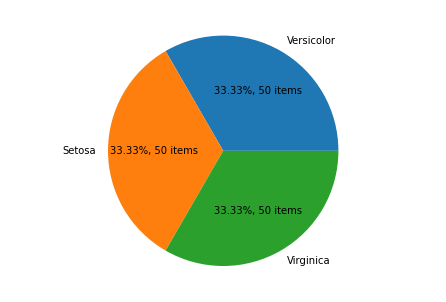

In [9]:
fig=plt.figure()
ax =fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Versicolor', 'Setosa', 'Virginica']
size = [50,50,50]
ax.pie(size, labels=labels,autopct=lambda p:f'{p:.2f}%, {p*sum(size)/100 :.0f} items')
plt.show()

In [10]:
import pingouin as pg

In [11]:
def plot_num(a):
    fig,axes=plt.subplots(3,2,figsize=(10,12))
    sns.histplot(x=df[a],kde=True,bins=10,ax=axes[0][0],palette='Pastel1')
    pg.qqplot(df[a],dist='norm',ax=axes[0][1])
    sns.barplot(x=df.species,y=df[a],ax=axes[1][0],palette='Pastel1')
    sns.stripplot(x=df.species,y=df[a],ax=axes[1][1],palette='Pastel1')
    sns.boxplot(y=df[a],x=df.species,hue='species',data=df,ax=axes[2][0],palette='Pastel1')
    sns.violinplot(y=df[a],x=df.species,hue='species',data=df,ax=axes[2][1],palette='Pastel1')
    plt.suptitle(a.title())
    plt.show()

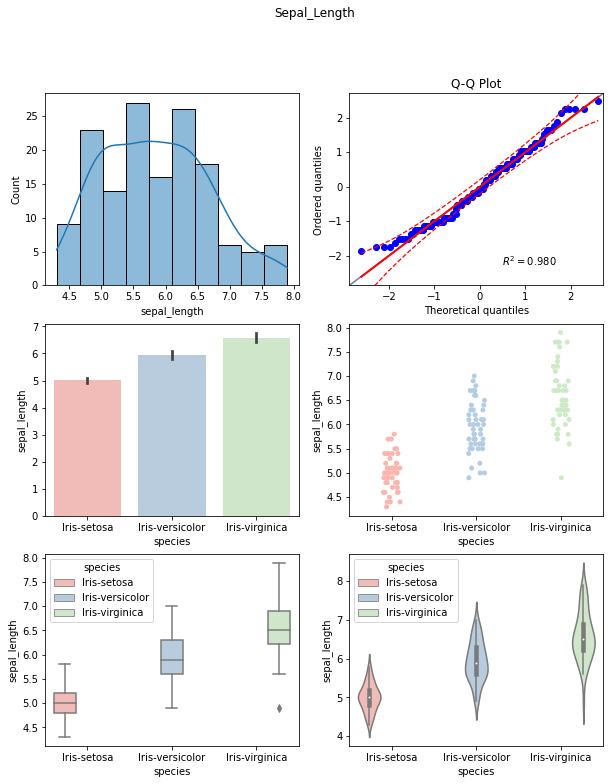

In [12]:
plot_num('sepal_length')

similarly we can plot data for other three attributes

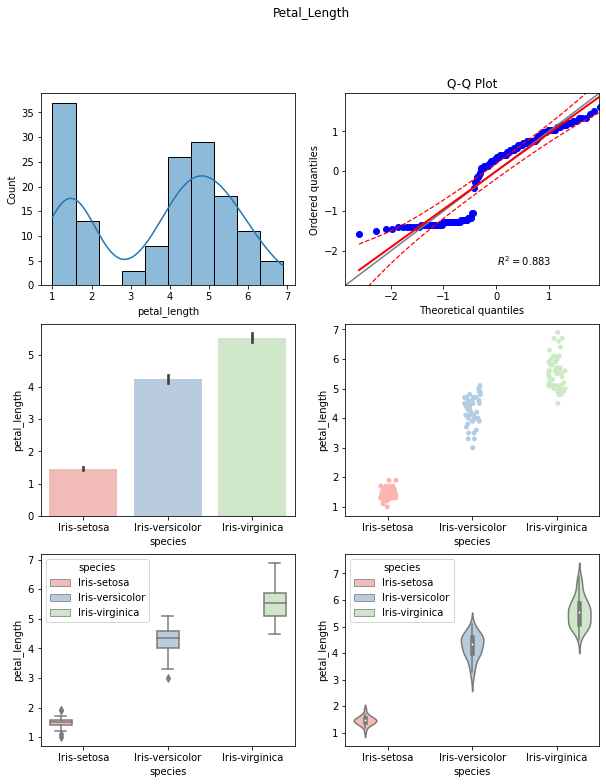

In [13]:
plot_num('petal_length')

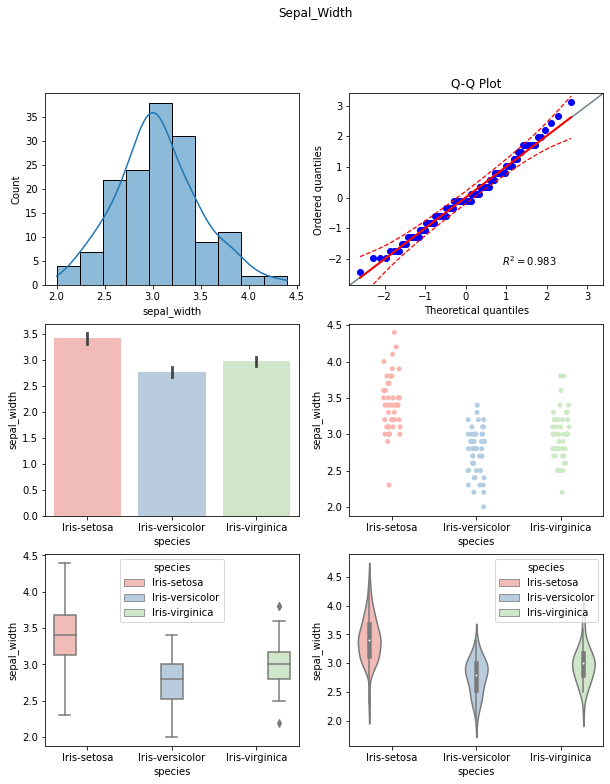

In [14]:
plot_num('sepal_width')

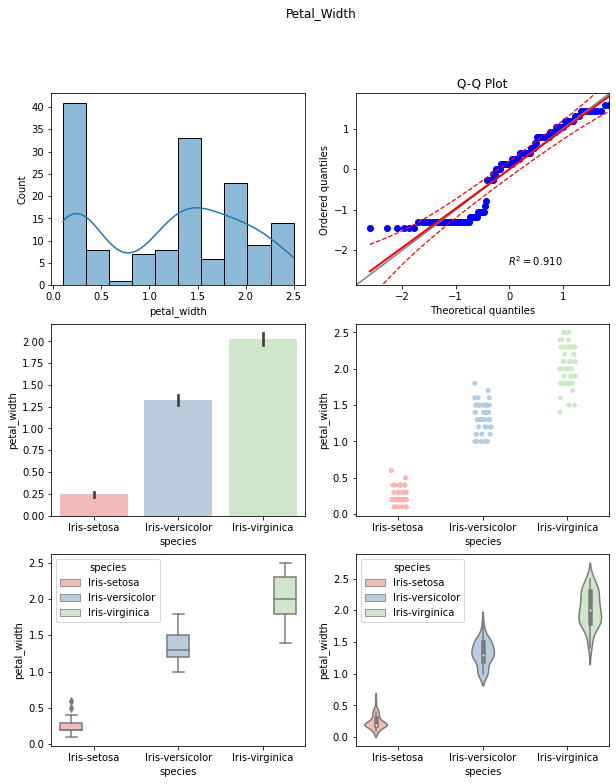

In [15]:
plot_num('petal_width')

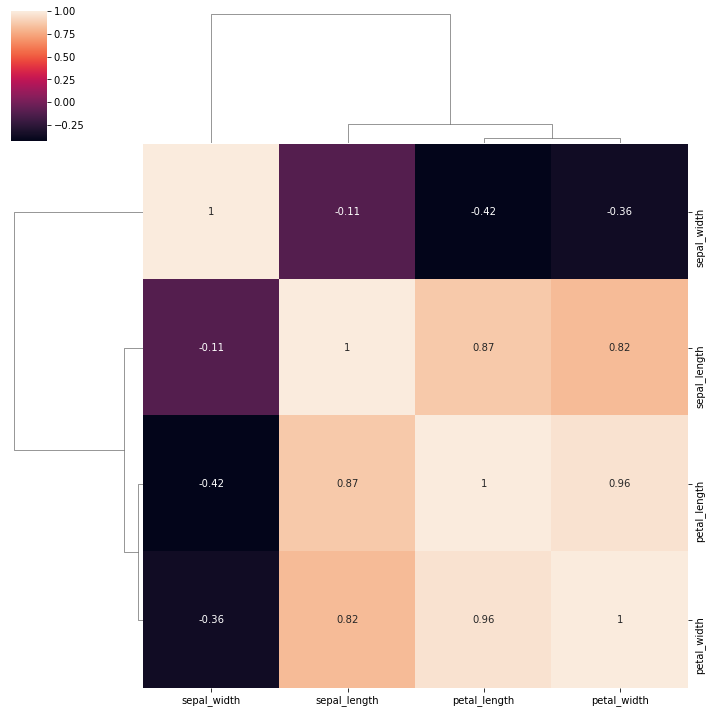

In [16]:
sns.clustermap(df.corr(),annot=True)

### Dividing the dataset

In [17]:
X = df.values[:, 0:4] 
Y = df.values[:,-1]

In [18]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2]], dtype=object)

In [19]:
Y[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Split and Train Model

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify =Y,random_state =38)

### Decision tree classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_pred = dtree.predict(X_train)

In [22]:
print("Training Data Set Accuracy: ", accuracy_score(Y_train,Y_pred))
print("Validation Mean F1 Score: ",cross_val_score(dtree,X_train,Y_train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(dtree,X_train,Y_train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Validation Mean F1 Score:  0.9329914529914529
Validation Mean Accuracy:  0.9428571428571428


[Text(133.92000000000002, 190.26, 'X[3] <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[3] <= 1.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(133.92000000000002, 81.53999999999999, 'X[2] <= 4.95\ngini = 0.219\nsamples = 40\nvalue = [0, 35, 5]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

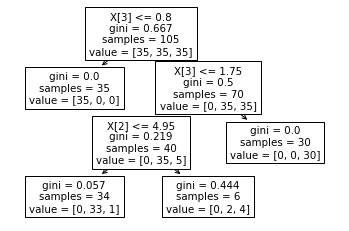

In [23]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth = 3)
dtree.fit(X_train,Y_train)
tree.plot_tree(dtree)

In [24]:
text_representation = tree.export_text(dtree)

print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: Iris-setosa
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



In [25]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score

In [26]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
Y_pred=dtree.predict(X_test)

In [28]:
print("Accuracy Score :",accuracy_score(Y_test,Y_pred))

Accuracy Score : 0.9777777777777777


### ROC Curve

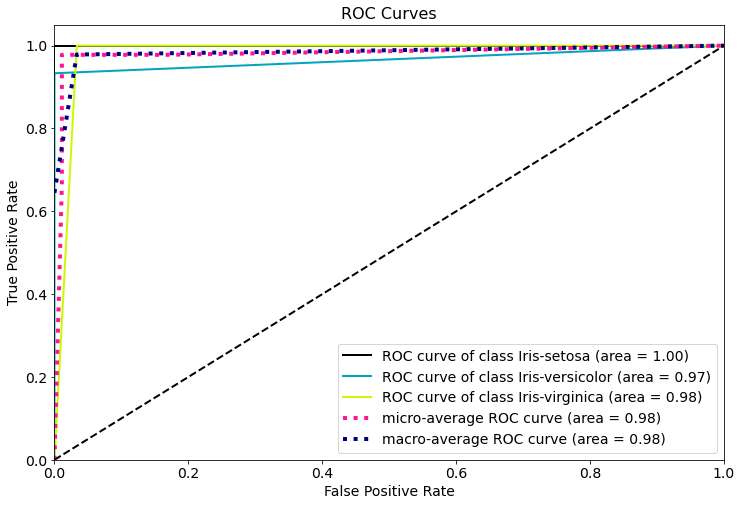

In [32]:
Y_prob = dtree.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test,Y_prob,figsize=(12,8),title_fontsize=16,text_fontsize=14)
plt.show()

### Precision Recall Curve

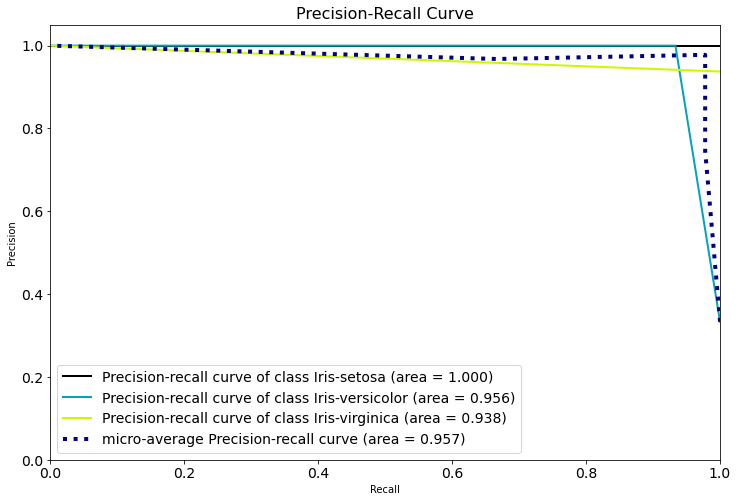

In [33]:
skplt.metrics.plot_precision_recall(Y_test,Y_prob,figsize=(12,8),title_fontsize=16,text_fontsize=14)
plt.show()

### Learning Curve

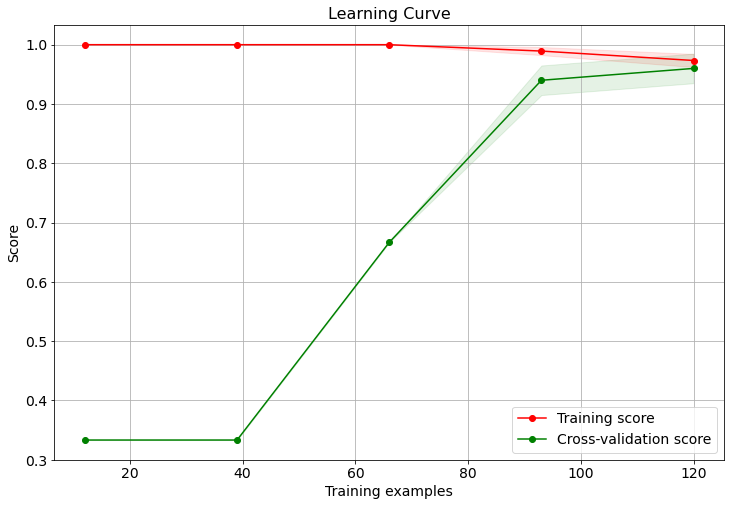

In [34]:
skplt.estimators.plot_learning_curve(dtree, X,Y,figsize=(12,8),title_fontsize=16,text_fontsize=14)
plt.show()

In [35]:
print(classification_report(Y_test,Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### THANK YOU